# 加载模块
- 绘图:matplotlib 
- 数值计算:numpy
- 图像处理:skimage

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io,color,data,filters,exposure,util

# 伪彩色图像生成

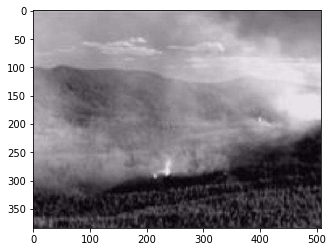

In [8]:
image=io.imread('timg.jpeg')
imagergb=image.copy()
imagergb[:,:,0]=np.interp(image[:,:,0],[0,50,100,150,200,255],[0,0,0,55,155,255])
imagergb[:,:,1]=np.interp(image[:,:,0],[0,50,100,150,200,255],[0,155,255,155,0,0])
imagergb[:,:,2]=np.interp(image[:,:,0],[0,50,100,150,200,255],[255,155,55,0,0,0])
plt.imshow(image)
#io.imsave('timgcolor.png',imagergb)

# 颜色映射表

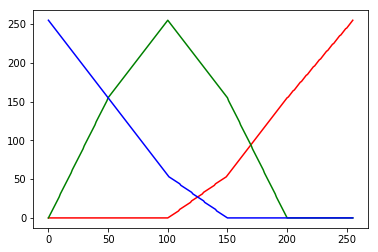

In [4]:
lutr=np.uint8(np.interp(range(256),[0,50,100,150,200,255],[0,0,0,55,155,255]))
lutg=np.uint8(np.interp(range(256),[0,50,100,150,200,255],[0,155,255,155,0,0]))
lutb=np.uint8(np.interp(range(256),[0,50,100,150,200,255],[255,155,55,0,0,0]))
plt.plot(range(256),lutr,'r',np.array(range(256)),lutg,'g',range(256),lutb,'b')

# 灰度图像变换

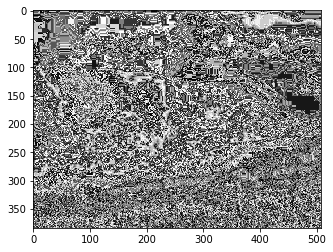

In [24]:
#shuffled gray scale but the rgb image is not affected because look up table is changed
lutgray=np.array(range(256))
lutshuffle=lutgray.copy()
np.random.shuffle(lutshuffle)

shuffled=np.uint8(np.interp(image[:,:,0],lutgray,lutshuffle))
#io.imsave('shuffled.png',shuffled)
plt.set_cmap('gray')
plt.imshow(shuffled)

# 映射表变换

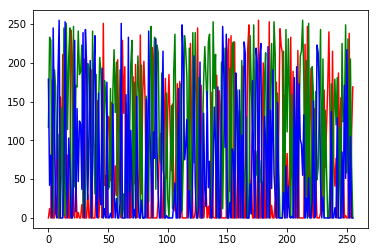

In [18]:
shuffledlutr=lutr.copy()
shuffledlutr[lutshuffle]=lutr
shuffledlutg=lutg.copy()
shuffledlutg[lutshuffle]=lutg
shuffledlutb=lutb.copy()
shuffledlutb[lutshuffle]=lutb
plt.plot(range(256),shuffledlutr,'r',np.array(range(256)),shuffledlutg,'g',range(256),shuffledlutb,'b')

# 灰度图像与映射表改变后的彩色图像

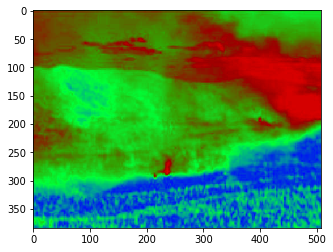

In [12]:
shuffledrgb=image.copy()
shuffledrgb[:,:,0]=np.interp(shuffled,lutgray,shuffledlutr)
shuffledrgb[:,:,1]=np.interp(shuffled,lutgray,shuffledlutg)
shuffledrgb[:,:,2]=np.interp(shuffled,lutgray,shuffledlutb)
plt.imshow(shuffledrgb)